# Viga del ejemplo 1

Calcule los diagramas de fuerza cortante, momento flector, ángulo de giro y deflexión vertical de la viga mostrada en la figura:

<img src="viga_1.png" width="600">

In [1]:
from sympy import symbols, init_printing, latex, DiracDelta, Piecewise, integrate, symbols, Eq, plot, piecewise_fold, solve
q0, x, L, E, I = symbols('q0 x L E I')

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se define una función que hace el código más corto y legible, evitando el uso de las [funciones G de Meijerg](https://en.wikipedia.org/wiki/Meijer_G-function):

In [2]:
integre = lambda f, x : integrate(f, x, meijerg=False)

Se especifica la carga distribuida $q(x)$:

In [3]:
q = -q0*x/L

Se resuelve la ecuación diferencial:

In [4]:
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
V = integre(q, x)       + C1
M = integre(V, x)       + C2
t = integre(M/(E*I), x) + C3
v = integre(t, x)       + C4

Se encuentran las constantes de integración que satisfacen las condiciones de frontera:

In [5]:
sol = solve([ Eq(t.subs(x,0), 0),   # giro en el apoyo (en x=0) es 0
              Eq(v.subs(x,0), 0),   # desplazamiento vertical en el apoyo (en x=0) es 0
              Eq(V.subs(x,L), 0),   # fuerza cortante en x=6 es 0
              Eq(M.subs(x,L), 0) ], # momento flector en x=6 es 0
              [ C1, C2, C3, C4 ])

Se reemplaza aquí el valor de las constantes de integración

In [6]:
V = V.subs(sol)
M = M.subs(sol)
t = t.subs(sol)
v = v.subs(sol)

### Se imprimen los resultados

In [7]:
imprimir("V(x) = ", V)

<IPython.core.display.Math object>

In [8]:
imprimir("M(x) = ", M)

<IPython.core.display.Math object>

In [9]:
imprimir(r"\theta(x) = ", t)

<IPython.core.display.Math object>

In [10]:
imprimir("v(x) = ", v)

<IPython.core.display.Math object>

### Se calculan las reacciones en la viga 

In [11]:
imprimir("F_y(x=0) =" , +V.subs(x, 0))

<IPython.core.display.Math object>

In [12]:
imprimir("M(x=0) =", -M.subs(x, 0))

<IPython.core.display.Math object>

Se grafican los resultados para los valores de las variables:

In [13]:
b = 0.10 # [m]
h = 0.15 # [m]

valores = [ (L,  3.0       ),   # [m]
            (E,  21e6      ),   # [kPa]
            (q0, 100       ),   # [kN/m]
            (I,  b*h*h*h/12)  ] # [m⁴]

V = V.subs(valores)
M = M.subs(valores)
t = t.subs(valores)
v = v.subs(valores)

In [14]:
x_xmin_xmax = (x, 0+0.001, 3-0.001)

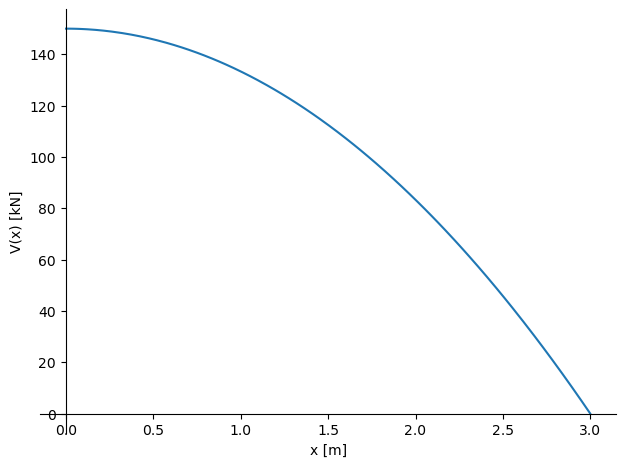

In [15]:
plot(V, x_xmin_xmax, xlabel='x [m]', ylabel='V(x) [kN]')

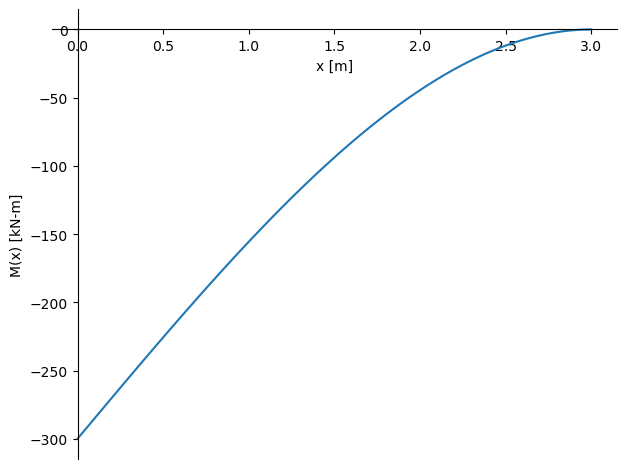

In [16]:
plot(M, x_xmin_xmax, xlabel='x [m]', ylabel='M(x) [kN-m]')

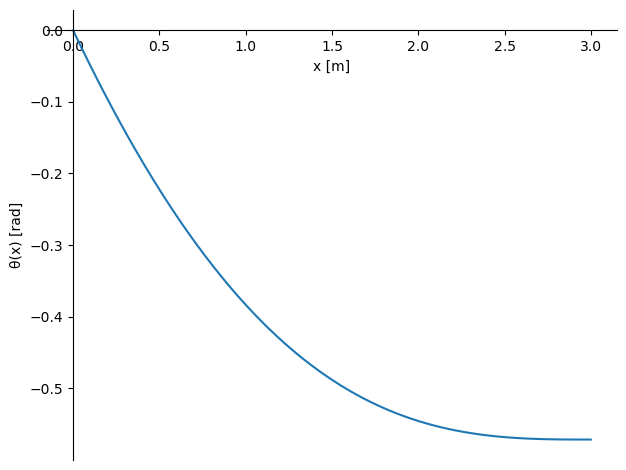

In [17]:
plot(t, x_xmin_xmax, xlabel='x [m]', ylabel='θ(x) [rad]')

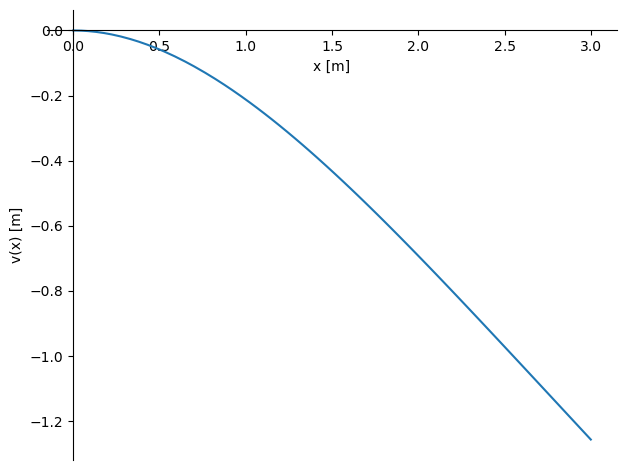

In [18]:
plot(v, x_xmin_xmax, xlabel='x [m]', ylabel='v(x) [m]')